In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
optimizers.RMSprop
optimizers.Adam
from tensorflow.keras.optimizers import RMSprop

In [2]:
img = image.load_img("basedata/train/weeds/1.png.jpeg")

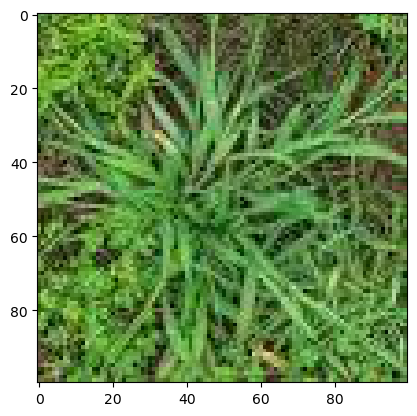

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("basedata/train/weeds/1.png.jpeg").shape

(100, 100, 3)

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (200,200),batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),batch_size = 3,
                                         class_mode = 'binary')

Found 2733 images belonging to 2 classes.
Found 1694 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'no_weeds': 0, 'weeds': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(8,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),  
                                    #
                                    tf.keras.layers.Conv2D(4,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),  
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(64,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(32,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(16,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(8,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [10]:
model.compile(optimizer = RMSprop(learning_rate=0.001),
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 25s 12s/step - loss: 0.6909 - accuracy: 0.6667 - val_loss: 0.6917 - val_accuracy: 0.5496
Epoch 2/30
3/3 [==============================] - 11s 6s/step - loss: 0.6916 - accuracy: 0.5556 - val_loss: 0.6916 - val_accuracy: 0.5496
Epoch 3/30
3/3 [==============================] - 12s 6s/step - loss: 0.6696 - accuracy: 1.0000 - val_loss: 0.6896 - val_accuracy: 0.5496
Epoch 4/30
3/3 [==============================] - 13s 6s/step - loss: 0.7002 - accuracy: 0.4444 - val_loss: 0.6901 - val_accuracy: 0.5496
Epoch 5/30
3/3 [==============================] - 13s 6s/step - loss: 0.7074 - accuracy: 0.3333 - val_loss: 0.6905 - val_accuracy: 0.5496
Epoch 6/30
3/3 [==============================] - 18s 9s/step - loss: 0.6963 - accuracy: 0.4444 - val_loss: 0.6907 - val_accuracy: 0.5496
Epoch 7/30
3/3 [==============================] - 11s 6s/step - loss: 0.7120 - accuracy: 0.1111 - val_loss: 0.6917 - val_accuracy: 0.5496
Epoch 8/30
3/3 [=================

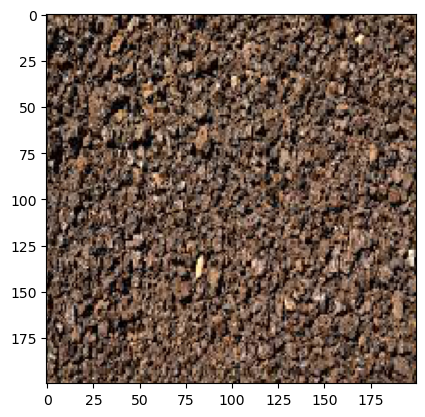

1/1 [==============================] - 0s 231ms/step
No weed


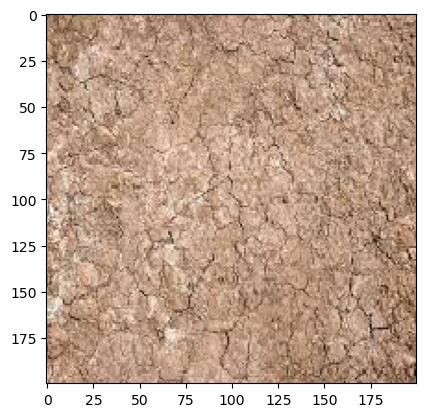

1/1 [==============================] - 0s 48ms/step
No weed


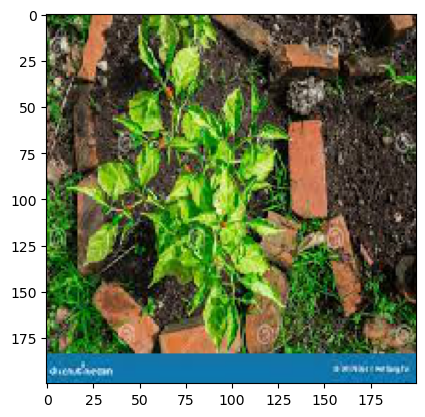

1/1 [==============================] - 0s 51ms/step
Weed


PermissionError: [Errno 13] Permission denied: 'basedata/test//weeds'

In [13]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val ==0:
        print("No weed")
    else:
        print("Weed")